# Fine-tuning a Model for Summarization Task

In this task, you will load, preprocess, and fine-tune a T5 model on a dataset of news articles for a summarization task. Follow the steps below carefully.

### Model and Dataset Information

For this task, you will be working with the following:

- **Model Checkpoint**: Use the pre-trained model checkpoint `yalsaffar/mt5-small-Arabic-Summarization` if you face any problem you can use `google-t5/t5-small` but the first one is the correct one for both the model and tokenizer.
- **Dataset**: You will be using the `CUTD/arabic_dialogue_df` dataset. Ensure to load and preprocess the dataset correctly for training and evaluation.

**Note:**
- Any additional steps or methods you include that improve or enhance the results will be rewarded with bonus points if they are justified.
- The steps outlined here are suggestions. You are free to implement alternative methods or approaches to achieve the task, as long as you explain the reasoning and the process at the bottom of the notebook.
- You can use either TensorFlow or PyTorch for this task. If you prefer TensorFlow, feel free to use it when working with Hugging Face Transformers.
- The number of data samples you choose to work with is flexible. However, if you select a very low number of samples and the training time is too short, this could affect the evaluation of your work.

## Step 1: Load the Dataset

Load the dataset and split it into training and test sets. Use 20% of the data for testing.

In [224]:
!pip install datasets

In [225]:
!pip install transformers

## Step 2: Load the Pretrained Tokenizer

Initialize a tokenizer from the gevin model checkpoint.

In [226]:
checkpoint = 'yalsaffar/mt5-small-Arabic-Summarization'
dataset = 'CUTD/arabic_dialogue_df'

In [227]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

from datasets import load_dataset
import pandas as pd

## Step 3: Preprocess the Dataset

Define a preprocessing function that adds a prefix ("summarize:") to each input if needed and tokenizes the text for the model. The labels will be the tokenized summaries.

In [264]:
data = load_dataset(dataset , split ='train[:5000]')

In [229]:

tokenizer = AutoTokenizer.from_pretrained("yalsaffar/mt5-small-Arabic-Summarization")
model = AutoModelForSeq2SeqLM.from_pretrained("yalsaffar/mt5-small-Arabic-Summarization")

In [265]:
data

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary'],
    num_rows: 5000
})

In [266]:
data = data.train_test_split(test_size=0.2)

In [267]:
data['train']

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary'],
    num_rows: 4000
})

In [268]:
data['test']

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary'],
    num_rows: 1000
})

In [269]:
data.set_format('pandas')
df = data['train'][:]
df.head()

,Unnamed: 0,dialogue,summary
0,4231,توم: دعونا نطلب بعض الطعام لهذه الليلة ، لا أش...,سوف توم ، سو وأليس يطلبون الطعام من دا جراسو ا...
1,1211,الشخص 1: هل جاء القطار بعد؟\n الشخص 2: لا ، ل...,الشخص 1 والشخص 2 ينتظران القطار ويشكون من تأخره.
2,4090,دونا: ما رأيك؟<iled_photo>\n كلوي: جيد بشكل أس...,تبدو دونا جيدة في ثوب يكلف 150 دولارًا.سوف تنت...
3,4680,دارسي: سنرى فرقتي المفضلة في نهاية الأسبوع الم...,سوف دارسي سيذهب إلى حفل خدعة رخيصة في نهاية ال...
4,1416,الشخص 1: هناك حبوب لكل شيء الآن ، أليس هناك؟\n...,يعتقد الشخص 1 أن هناك حبوب منع الحمل لكل شيء م...


In [270]:
df = data['train'][:]
df_test = data['test'][:]

In [271]:
df.head()

,Unnamed: 0,dialogue,summary
0,4231,توم: دعونا نطلب بعض الطعام لهذه الليلة ، لا أش...,سوف توم ، سو وأليس يطلبون الطعام من دا جراسو ا...
1,1211,الشخص 1: هل جاء القطار بعد؟\n الشخص 2: لا ، ل...,الشخص 1 والشخص 2 ينتظران القطار ويشكون من تأخره.
2,4090,دونا: ما رأيك؟<iled_photo>\n كلوي: جيد بشكل أس...,تبدو دونا جيدة في ثوب يكلف 150 دولارًا.سوف تنت...
3,4680,دارسي: سنرى فرقتي المفضلة في نهاية الأسبوع الم...,سوف دارسي سيذهب إلى حفل خدعة رخيصة في نهاية ال...
4,1416,الشخص 1: هناك حبوب لكل شيء الآن ، أليس هناك؟\n...,يعتقد الشخص 1 أن هناك حبوب منع الحمل لكل شيء م...


In [272]:
df.shape

(4000, 3)

In [273]:
df['summary_length'] = df['summary'].str.len()
df['dialogue_length'] = df['dialogue'].str.len()

In [274]:
df.head()

,Unnamed: 0,dialogue,summary,summary_length,dialogue_length
0,4231,توم: دعونا نطلب بعض الطعام لهذه الليلة ، لا أش...,سوف توم ، سو وأليس يطلبون الطعام من دا جراسو ا...,181,420
1,1211,الشخص 1: هل جاء القطار بعد؟\n الشخص 2: لا ، ل...,الشخص 1 والشخص 2 ينتظران القطار ويشكون من تأخره.,48,305
2,4090,دونا: ما رأيك؟<iled_photo>\n كلوي: جيد بشكل أس...,تبدو دونا جيدة في ثوب يكلف 150 دولارًا.سوف تنت...,64,507
3,4680,دارسي: سنرى فرقتي المفضلة في نهاية الأسبوع الم...,سوف دارسي سيذهب إلى حفل خدعة رخيصة في نهاية ال...,124,452
4,1416,الشخص 1: هناك حبوب لكل شيء الآن ، أليس هناك؟\n...,يعتقد الشخص 1 أن هناك حبوب منع الحمل لكل شيء م...,136,668


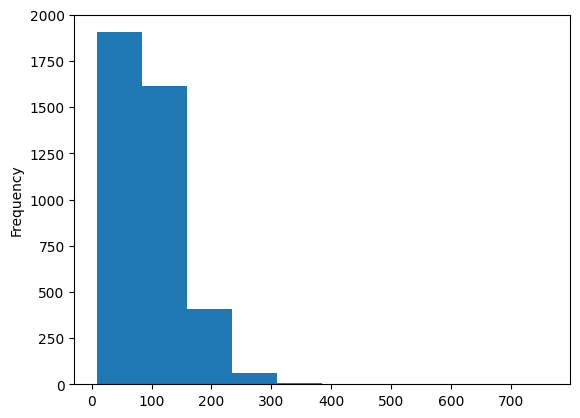

In [275]:
df['summary_length'].plot(kind = 'hist');

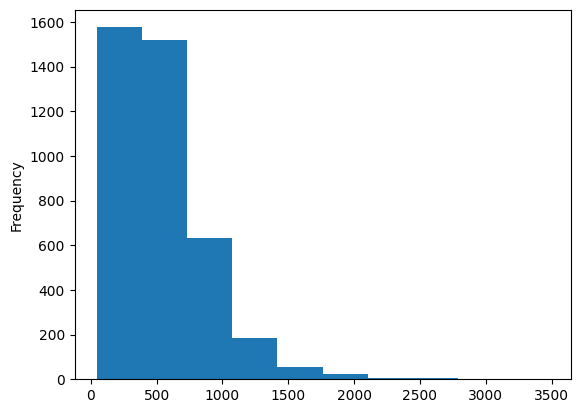

In [276]:
df['dialogue_length'].plot(kind = 'hist');

In [277]:
df.sample(5)

,Unnamed: 0,dialogue,summary,summary_length,dialogue_length
1969,2344,الشخص 1: جين ، أمس ، تلقيت مكالمة من مركز الشر...,الشخص 1 وجين يتحدثان عن بيجي ، الذي سرق جواز س...,116,675
1,1211,الشخص 1: هل جاء القطار بعد؟\n الشخص 2: لا ، ل...,الشخص 1 والشخص 2 ينتظران القطار ويشكون من تأخره.,48,305
2318,1785,الشخص 1: شكرًا لك على إقراضك للكتاب.\n الشخص ...,يضفي الشخص 2 كتابًا على الشخص 1 ويعتقد أن قراء...,79,218
2947,509,الشخص 1: كيف يمكنني إنقاص الوزن يا دكتور؟يبدو ...,الشخص 1 يستشير الشخص 2 حول كيفية إنقاص الوزن.ي...,106,710
3183,4120,الشخص 1: معذرة ، أود أن أقوم بدعلة لهذه المادة...,الشخص 1 يريد أن يصنع بدلة واحدة من الصدر.الشخص...,96,465


In [278]:
#!pip install pyarabic

In [279]:
import re
from pyarabic.araby import strip_tashkeel , strip_harakat , strip_tatweel , normalize_hamza

In [280]:
#!pip install emoji

In [281]:
import emoji

In [282]:
numbers = r'[\d+]'
punct = r'[^\w\s]'
pattern_n =r'[^[[\w][\n]'
pattern_eng = r'([A-Za-z])\w+'
re_patterns = '|'.join([numbers,punct])

In [283]:
def clean_data(text):
  text = re.sub(numbers , '' , text)
  text = re.sub(pattern_n , ' ' , text)
  text = re.sub(pattern_eng , '' , text)
  text = re.sub(punct , '' , text)
  text=re.sub(re_patterns,'',text)
  text = strip_tashkeel(text)
  text = normalize_hamza(text)


  return text

In [284]:
df['summary'] = df['summary'].apply(clean_data)
df['dialogue'] = df['dialogue'].apply(clean_data)


In [285]:
df.head()

,Unnamed: 0,dialogue,summary,summary_length,dialogue_length
0,4231,توم دعونا نطلب بعض الطعام لهذه الليلة لا ءشعر...,سوف توم سو وءليس يطلبون الطعام من دا جراسو ال...,181,420
1,1211,الشخص هل جاء القطار بعد الشخص لا لقد كنت ...,الشخص والشخص ينتظران القطار ويشكون من تءخره,48,305
2,4090,دونا ما رءيك كلوي جيد بشكل ءساسي ولكن على نط...,تبدو دونا جيدة في ثوب يكلف دولاراسوف تنتظر حت...,64,507
3,4680,دارسي سنرى فرقتي المفضلة في نهاية الءسبوع المق...,سوف دارسي سيذهب ءلى حفل خدعة رخيصة في نهاية ال...,124,452
4,1416,الشخص هناك حبوب لكل شيء الءءن ءليس هناك ال...,يعتقد الشخص ءن هناك حبوب منع الحمل لكل شيء مث...,136,668


In [286]:
df_test['summary'] = df_test['summary'].apply(clean_data)
df_test['dialogue'] = df_test['dialogue'].apply(clean_data)

In [287]:
df_test.head()

,Unnamed: 0,dialogue,summary
0,1333,جيسيكا ءءارغ جيسون ما هو الخطء جيسيكا لا ءست...,لا تستطيع جيسيكا الوقوف فيفيان لءن فيفيان مملة...
1,643,جيسي جيسي لا يمكن ءليسون \n روبن فرحان...,تشارك جيسي مقطع فيديو مضحك مع ءليسون وروبن وءر...
2,4586,الشخص خدمة طريق الطوارءهل يمكن ءن ءساعدك ال...,الشخص يدعو خدمة الطرق الطارءة كشخص لديه ءطار...
3,733,الشخص ماذا تعرف عن شركتنا الشخص حسنا كما ...,الشخص هو ءجراء مقابلة مع الشخص يناقشون الشخص ...
4,467,الشخص صباح الخيراسمي جون سميثءنا مدير استيراد...,يوافق جون سميث و هونغ على التعاون لاستيراد وتص...


In [288]:
df['summary']

,summary
0,سوف توم سو وءليس يطلبون الطعام من دا جراسو ال...
1,الشخص والشخص ينتظران القطار ويشكون من تءخره
2,تبدو دونا جيدة في ثوب يكلف دولاراسوف تنتظر حت...
3,سوف دارسي سيذهب ءلى حفل خدعة رخيصة في نهاية ال...
4,يعتقد الشخص ءن هناك حبوب منع الحمل لكل شيء مث...
...,...
3995,تم ءلغاء رحلة الشخص وهو منزعج لذلك يساعده ال...
3996,يشاهد الشخص والشخص فيلما وثاءقيا يحبونه ولكن...
3997,الشخص يوصي الطبق الحامض ولكن الشخص ليس في ال...
3998,سيذهب الشخص ءلى شنغهاي لممارسة هناك والشخص ي...


In [289]:
def preprocess_function(examples):
    inputs = ["summarize: " + doc for doc in examples['dialogue']]
    model_inputs = tokenizer(inputs, max_length=512, truncation=True,return_tensors='tf',padding=True)

#Tokenize the labels
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['summary'], max_length=150, truncation=True,return_tensors='tf',padding=True)

    model_inputs['labels'] = labels['input_ids']
    return model_inputs

In [290]:
from datasets import DatasetDict , Dataset
df_train = Dataset.from_pandas(pd.DataFrame(df,columns=df.columns))
df_test = Dataset.from_pandas(pd.DataFrame(df_test,columns=df_test.columns))


## Step 4: Define the Data Collator

Use a data collator designed for sequence-to-sequence models, which dynamically pads inputs and labels.

In [291]:
tokin_data_train=df_train.map(preprocess_function,batched=True)
tokin_data_test=df_test.map(preprocess_function,batched=True)

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:4126: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [292]:
from transformers import DataCollatorForSeq2Seq
import tensorflow as tf

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model, return_tensors="tf")

## Step 5: Load the Pretrained Model

Load the model for sequence-to-sequence tasks (summarization).

In [293]:
from transformers import TFT5ForConditionalGeneration
model = TFT5ForConditionalGeneration.from_pretrained('yalsaffar/mt5-small-Arabic-Summarization')

You are using a model of type mt5 to instantiate a model of type t5. This is not supported for all configurations of models and can yield errors.
/usr/local/lib/python3.10/dist-packages/tf_keras/src/initializers/initializers.py:121: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


## Step 6: Define Training Arguments

In [295]:
tokin_data_train

Dataset({
    features: ['Unnamed: 0', 'dialogue', 'summary', 'summary_length', 'dialogue_length', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 4000
})

Set up the training configuration with parameters like learning rate, batch size, and number of epochs.

In [299]:
tf_train_set = model.prepare_tf_dataset(columns=['input_ids'],
    label_cols=['labels'],
    tokin_data_train,
    shuffle=True,
    batch_size=8,
    collate_fn=data_collator,
)
tf_test_set = model.prepare_tf_dataset(columns=['input_ids'],
    label_cols=['labels'],
    tokin_data_test,
    shuffle=False,
    batch_size=8,
    collate_fn=data_collator,
)

SyntaxError: positional argument follows keyword argument (<ipython-input-299-d76675bd1189>, line 7)

## Step 7: Initialize the Trainer

Use the `Seq2SeqTrainer` class to train the model.

## Step 8: Fine-tune the Model

Train the model using the specified arguments and dataset.

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss)

In [ ]:
model.fit(tf_train_set, validation_data=tf_test_set, epochs=1)


## Step 9: Inference

Once the model is trained, perform inference on a sample text to generate a summary. Use the tokenizer to process the text, and then feed it into the model to get the generated summary.

In [ ]:
def generate_summary(text):
    input_ids = tokenizer("summarize: " + text, return_tensors="tf").input_ids
    outputs = model.generate(input_ids)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary

Example Inference
sample_text = """
علم البيانات (بالإنكليزية: Data science) علم يغلب عليه تداخل الاختصاصات والذي يقوم على استخدام الأساليب العلمية، والمعالجات والخوارزميات والنظم لاستخراج المعرفة والأفكار من البيانات بشكليها، سواء مُهيكلة، أو غير مهيكلة، بشكل مشابه للتنقيب في البيانات. كما يعتمد علم البيانات على تقنيات تعلم الآلة والذكاء الصناعي وبرامج معالجة البيانات الضخمة. يُسمى الخبير بها عالم بيانات (بالإنكليزية: Data scientist).

ويُعرف علم البيانات بأنه «مفهوم قائم على توحيد الإحصاء، وتحليل البيانات وتعلم الآلة والوسائل المرتبطة بهم من أجل فهم وتحليل ظاهرة فعلية باستخدام البيانات».

وهو يقوم بتوظيف نظريات وأساليب مستمدة من حقول معرفية متعددة في سياق الرياضيات والإحصاء وعلم المعلومات وعلوم الحاسب."""
print(generate_summary(sample_text))